In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('txn_history_dummysample.csv')
df['month'] = pd.to_datetime(df['txn_ts']).dt.month
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['txn_ts'] = pd.to_datetime(df['txn_ts'])
df['age'] = 2021 - df['date_of_birth'].dt.year
bins = [0, 18, 25, 40, 55, float('inf')]
labels = ['<18', '18-25', '25-40', '40-55', '55+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code,month,age,age_group
0,ID000001,2000-01-12,2021-01-01 11:52:00,-42000,2,1,21,18-25
1,ID000001,2000-01-12,2021-01-01 13:01:00,-148000,2,1,21,18-25
2,ID000001,2000-01-12,2021-01-02 14:41:00,-1092000,1,1,21,18-25
3,ID000001,2000-01-12,2021-01-04 13:55:00,-197000,1,1,21,18-25
4,ID000001,2000-01-12,2021-01-04 14:50:00,-162000,1,1,21,18-25
...,...,...,...,...,...,...,...,...
200162,ID006847,2000-11-11,2021-03-31 13:35:00,8000,4,3,21,18-25
200163,ID006847,2000-11-11,2021-03-31 13:23:00,22000,4,3,21,18-25
200164,ID006847,2000-11-11,2021-03-31 13:36:00,7000,4,3,21,18-25
200165,ID006847,2000-11-11,2021-03-31 13:23:00,4000,4,3,21,18-25


## ANALYZING TYPE CODE

In [3]:
df1 = df[df['txn_amount']<0]
display(df1.head())
print(df1['txn_type_code'].unique())

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code,month,age,age_group
0,ID000001,2000-01-12,2021-01-01 11:52:00,-42000,2,1,21,18-25
1,ID000001,2000-01-12,2021-01-01 13:01:00,-148000,2,1,21,18-25
2,ID000001,2000-01-12,2021-01-02 14:41:00,-1092000,1,1,21,18-25
3,ID000001,2000-01-12,2021-01-04 13:55:00,-197000,1,1,21,18-25
4,ID000001,2000-01-12,2021-01-04 14:50:00,-162000,1,1,21,18-25


[2 1 5]


In [4]:
df2 = df[df['txn_amount']>0]
display(df2.head())
print(df2['txn_type_code'].unique())

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code,month,age,age_group
7,ID000001,2000-01-12,2021-01-05 17:38:00,484000,1,1,21,18-25
14,ID000001,2000-01-12,2021-01-16 19:24:00,4410000,1,1,21,18-25
20,ID000001,2000-01-12,2021-01-21 14:57:00,54000,1,1,21,18-25
22,ID000001,2000-01-12,2021-01-23 20:53:00,1032000,1,1,21,18-25
30,ID000001,2000-01-12,2021-01-27 23:18:00,199000,1,1,21,18-25


[1 3 6 4 7]


In [5]:
df3 = df[df['txn_amount']==0]
display(df3.head())
print(df3['txn_type_code'].unique())

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code,month,age,age_group
1148,ID000042,1988-12-04,2021-02-25 16:36:00,0,1,2,33,25-40
3396,ID000117,1993-11-26,2021-01-05 20:37:00,0,1,1,28,25-40
3397,ID000117,1993-11-26,2021-01-05 20:59:00,0,1,1,28,25-40
8075,ID000283,1981-03-10,2021-03-16 18:32:00,0,1,3,40,40-55
8536,ID000315,1997-08-10,2021-03-17 00:41:00,0,1,3,24,18-25


[1]


-  Type code 1 is Internal Transfer

In [6]:
df1_grouped = df1.groupby('txn_type_code')['txn_amount'].mean().reset_index()
df1_grouped['txn_amount'] = df1_grouped['txn_amount'].astype(int)
df1_grouped


,txn_type_code,txn_amount
0,1,-682083
1,2,-3918834
2,5,-65183


- Type code 5 is Phone Top-UP

In [7]:
df2_grouped = df2.groupby('txn_type_code')['txn_amount'].mean().reset_index()
df2_grouped['txn_amount'] = df2_grouped['txn_amount'].astype(int)
df2_grouped


,txn_type_code,txn_amount
0,1,6180295
1,3,2304939
2,4,195599
3,6,33642
4,7,3293616


- Type code 6 is Gift Payment

- Other type codes relate to savings account transactions.

## ANALYSIS OF THE NUMBER OF TRANSACTIONS OCCURRING PER MINUTE

In [8]:
df['datetime_formatted'] = df['txn_ts'].dt.strftime('%Y-%m-%d-%H-%M')
df_grouped = df.groupby('datetime_formatted').agg({'account_id': 'count'})
df_grouped_sorted = df_grouped.sort_values(by='account_id', ascending=False)
df_grouped_sorted

,account_id
datetime_formatted,
2021-02-09-17-20,14
2021-02-03-11-29,12
2021-01-22-14-46,12
2021-03-05-18-49,12
2021-02-02-15-32,12
...,...
2021-02-15-09-04,1
2021-02-15-09-05,1
2021-02-15-09-07,1


In [9]:
df_sorted = df.sort_values(by='txn_ts')
df_sorted['time_diff'] = df_sorted['txn_ts'].diff()
total_transactions = len(df_sorted)
total_minutes = (df_sorted['txn_ts'].max() - df_sorted['txn_ts'].min()).total_seconds() / 60
avg_transactions_per_minute = total_transactions / total_minutes
print(avg_transactions_per_minute)

1.5503001200480193


-  The number of transactions occurring per minute is relatively low according to the data, with the highest being only 14 transactions per minute. On average, there are only 1.5 transactions per minute. This figure is unlikely to have any impact on the system's capacity, as banking systems can handle thousands of transactions per minute.

### ANALYSIS OF THE NUMBER OF TRANSACTIONS RELATED TO INTERNAL TRANSFERS

In [10]:
df_internal_tranfer = df[df['txn_type_code']==1]

In [11]:
df_avg_trans_by_month = df_internal_tranfer.groupby(['month', 'age_group']).agg(
    avg_txn_amount=('txn_amount', lambda x: x.abs().mean()),
    txn_count=('txn_amount', 'count'),
    unique_account_count=('account_id', 'nunique')
)
df_avg_trans_by_month['avg_txn_amount'].fillna(0, inplace=True)
df_avg_trans_by_month['avg_txn_amount'] = df_avg_trans_by_month['avg_txn_amount'].astype(int)
df_avg_trans_by_month['avg_trans_per_acc'] = df_avg_trans_by_month['txn_count']/df_avg_trans_by_month['unique_account_count']
df_avg_trans_by_month['avg_trans_per_acc'].fillna(0, inplace=True)
df_avg_trans_by_month['avg_trans_per_acc'] = df_avg_trans_by_month['avg_trans_per_acc'].astype(int)
df_avg_trans_by_month



/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/2192787256.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg_trans_by_month = df_internal_tranfer.groupby(['month', 'age_group']).agg(


avg_txn_amount  txn_count  unique_account_count  \
month age_group                                                    
1     <18                     0          0                     0   
      18-25             1087742      18356                  1286   
      25-40             4922883      20528                  1651   
      40-55             7242377       1411                   132   
      55+               9964992        262                    40   
2     <18                 37000          8                     1   
      18-25             1158518      16196                  2085   
      25-40             4968498      17696                  2007   
      40-55             7448497       1478                   226   
      55+               6248474        329                    65   
3     <18                     0          0                     0   
      18-25              987462      20751                  1506   
      25-40             5072781      20586                  1735   
      40-55            12697960       1367                   156   
      55+               5858936        282                    52   
4     <18                     0          0                     0   
      18-25             1051000          6                     5   
      25-40              563333          3                     3   
      40-55                   0          0                     0   
      55+                     0          0                     0   

                 avg_trans_per_acc  
month age_group                     
1     <18                        0  
      18-25                     14  
      25-40                     12  
      40-55                     10  
      55+                        6  
2     <18                        8  
      18-25                      7  
      25-40                      8  
      40-55                      6  
      55+                        5  
3     <18                        0  
      18-25                     13  
      25-40                     11  
      40-55                      8  
      55+                        5  
4     <18                        0  
      18-25                      1  
      25-40                      1  
      40-55                      0  
      55+                        0

/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/1209820731.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_internal_tranfer.groupby(['month','age_group'])['account_id'].nunique()


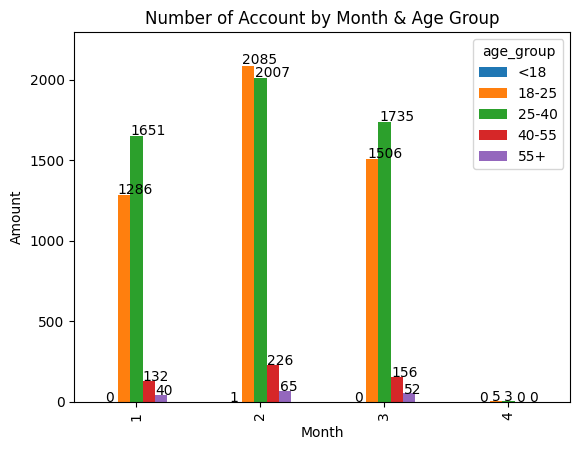

In [12]:
age_group_counts = df_internal_tranfer.groupby(['month','age_group'])['account_id'].nunique() 

df_unstacked = age_group_counts.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Number of Account by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  # Đặt giới hạn cho trục y
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()



/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/2963406384.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_trans_counts = df_internal_tranfer.groupby(['month','age_group'])['account_id'].count()


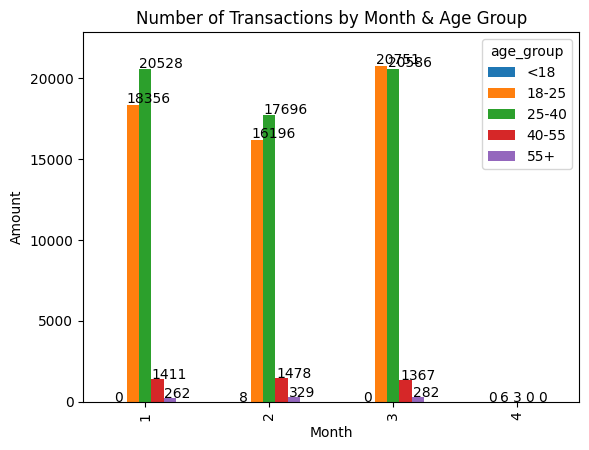

In [13]:
age_group_trans_counts = df_internal_tranfer.groupby(['month','age_group'])['account_id'].count() 

df_unstacked = age_group_trans_counts.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Number of Transactions by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  # Đặt giới hạn cho trục y
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/2278538879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_counts = df_internal_tranfer.groupby(['month','age_group'])['txn_amount'].mean()


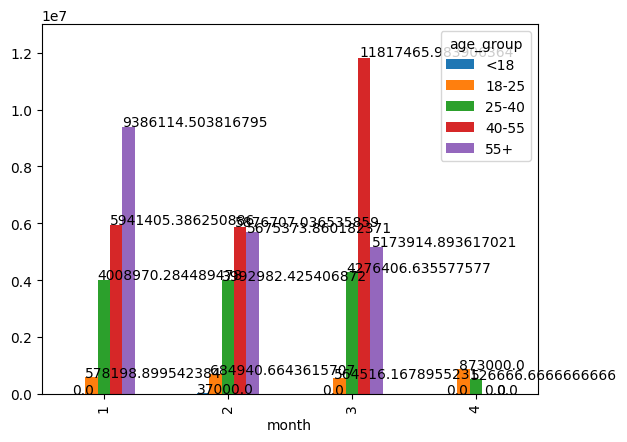

In [14]:
age_group_avg_counts = df_internal_tranfer.groupby(['month','age_group'])['txn_amount'].mean() 
# age_group_avg_counts = df_avg_trans_by_month[['month','age_group','avg_txn_amount']]

df_unstacked = age_group_avg_counts.unstack()
ax = df_unstacked.plot(kind='bar')

# plt.title('Average of Transactions by Month & Age Group')
# plt.xlabel('Month')
# plt.ylabel('Amount')

plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/763522860.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_amount = df_internal_tranfer.groupby(['month','age_group']).agg(


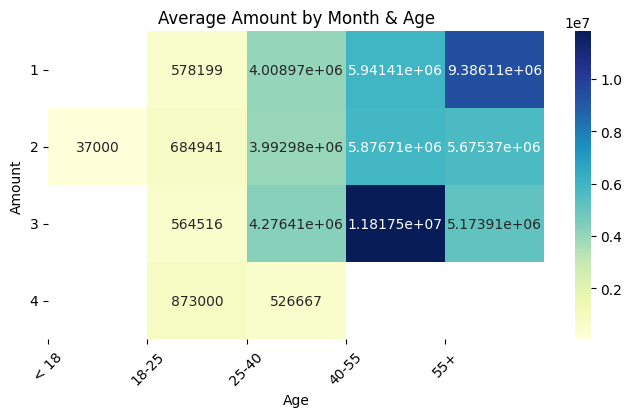

In [15]:
age_group_avg_amount = df_internal_tranfer.groupby(['month','age_group']).agg(
    # avg_txn_amount=('txn_amount', lambda x: x.abs().mean()))
    avg_txn_amount=('txn_amount', 'mean'))

heatmap_data = age_group_avg_amount.unstack(level='age_group')

plt.figure(figsize=(8, 4))
sns.heatmap(data=heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

age_group_names = ['< 18', '18-25', '25-40', '40-55', '55+']
plt.xticks(ticks=range(len(age_group_names)), labels=age_group_names, rotation=45)
plt.yticks(rotation=0)

plt.title('Average Amount by Month & Age')
plt.xlabel('Age')
plt.ylabel('Amount')

plt.show()


### ANALYSIS OF THE NUMBER OF TRANSACTIONS RELATED TO EXTERNAL TRANSFERS

In [16]:
df_external_tranfer = df[df['txn_type_code']==2]

In [17]:
df_avg_trans_by_month = df_external_tranfer.groupby(['month', 'age_group']).agg(
    avg_txn_amount=('txn_amount', lambda x: x.abs().mean()),
    txn_count=('txn_amount', 'count'),
    unique_account_count=('account_id', 'nunique')
)
df_avg_trans_by_month['avg_txn_amount'].fillna(0, inplace=True)
df_avg_trans_by_month['avg_txn_amount'] = df_avg_trans_by_month['avg_txn_amount'].astype(int)
df_avg_trans_by_month['avg_trans_per_acc'] = df_avg_trans_by_month['txn_count']/df_avg_trans_by_month['unique_account_count']
df_avg_trans_by_month['avg_trans_per_acc'].fillna(0, inplace=True)
df_avg_trans_by_month['avg_trans_per_acc'] = df_avg_trans_by_month['avg_trans_per_acc'].astype(int)
df_avg_trans_by_month



/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/3415290961.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg_trans_by_month = df_external_tranfer.groupby(['month', 'age_group']).agg(


avg_txn_amount  txn_count  unique_account_count  \
month age_group                                                    
1     <18                     0          0                     0   
      18-25             1160764       7493                  1105   
      25-40             5000465      13023                  1453   
      40-55             9050138        699                   106   
      55+              20372078        102                    24   
2     <18                 97125          8                     1   
      18-25             1128858       7588                  1999   
      25-40             4996825      11627                  1854   
      40-55             6912839        833                   189   
      55+              11239309        126                    51   
3     <18                 52000          2                     2   
      18-25             1341658       7912                  1374   
      25-40             5472318      13060                  1618   
      40-55            12263794        756                   139   
      55+               7067572        124                    35   
4     <18                     0          0                     0   
      18-25              636600          5                     5   
      25-40              364000          2                     2   
      40-55                   0          0                     0   
      55+                     0          0                     0   

                 avg_trans_per_acc  
month age_group                     
1     <18                        0  
      18-25                      6  
      25-40                      8  
      40-55                      6  
      55+                        4  
2     <18                        8  
      18-25                      3  
      25-40                      6  
      40-55                      4  
      55+                        2  
3     <18                        1  
      18-25                      5  
      25-40                      8  
      40-55                      5  
      55+                        3  
4     <18                        0  
      18-25                      1  
      25-40                      1  
      40-55                      0  
      55+                        0

/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/1236234730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_external_tranfer.groupby(['month','age_group'])['account_id'].nunique()


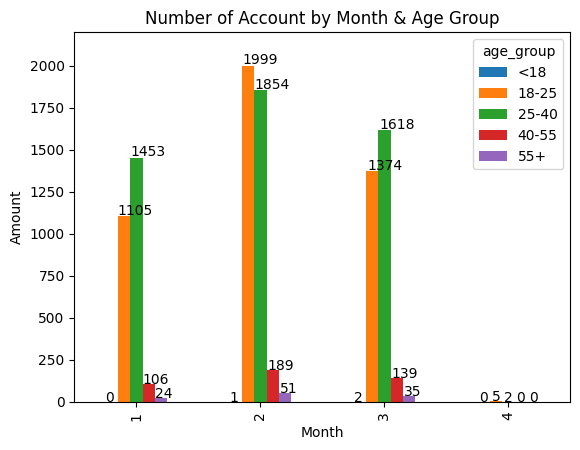

/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/1236234730.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_trans_counts = df_external_tranfer.groupby(['month','age_group'])['account_id'].count()


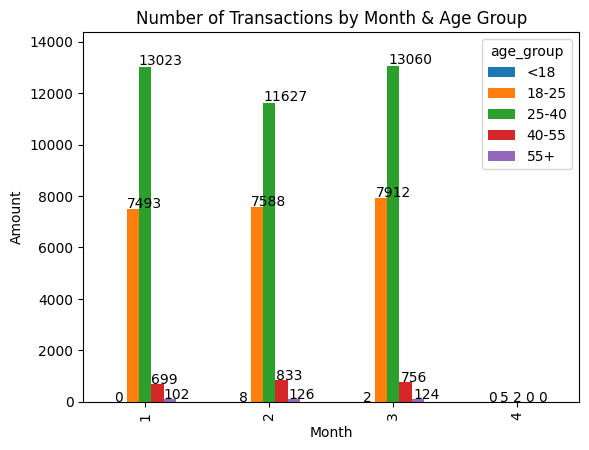

/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/1236234730.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_amount = df_external_tranfer.groupby(['month', 'age_group']).agg({'txn_amount': lambda x: x.abs().mean()})


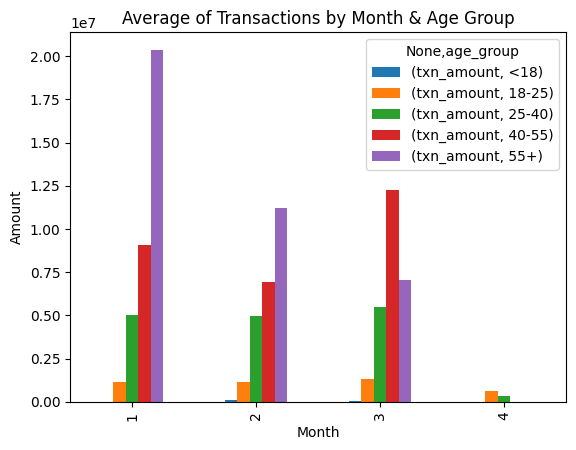

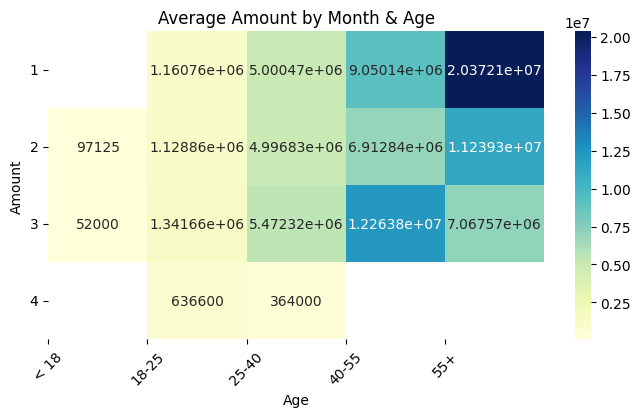

In [18]:
age_group_counts = df_external_tranfer.groupby(['month','age_group'])['account_id'].nunique() 

# Account
df_unstacked = age_group_counts.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Number of Account by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  # Đặt giới hạn cho trục y
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Number of transactions
age_group_trans_counts = df_external_tranfer.groupby(['month','age_group'])['account_id'].count() 

df_unstacked = age_group_trans_counts.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Number of Transactions by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Average of transaction
age_group_avg_amount = df_external_tranfer.groupby(['month', 'age_group']).agg({'txn_amount': lambda x: x.abs().mean()})

df_unstacked = age_group_avg_amount.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Average of Transactions by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

# plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

#Average of transactions
# age_group_avg_amount = df_external_tranfer.groupby(['month','age_group']).agg(
#     # avg_txn_amount=('txn_amount', lambda x: x.abs().mean()))
#     avg_txn_amount=('txn_amount', 'mean'))

heatmap_data = age_group_avg_amount.unstack(level='age_group')

plt.figure(figsize=(8, 4))
sns.heatmap(data=heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

age_group_names = ['< 18', '18-25', '25-40', '40-55', '55+']
plt.xticks(ticks=range(len(age_group_names)), labels=age_group_names, rotation=45)
plt.yticks(rotation=0)

plt.title('Average Amount by Month & Age')
plt.xlabel('Age')
plt.ylabel('Amount')

plt.show()


### ANALYSIS OF THE NUMBER OF TRANSACTIONS RELATED TO SAVING TRANSACTIONS

In [19]:
df_saving = df[(df['txn_type_code'] == 3) | (df['txn_type_code'] == 4) | (df['txn_type_code'] == 7)]
df_saving

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code,month,age,age_group,datetime_formatted
114,ID000002,2001-02-11,2021-01-02 17:20:00,55000,3,1,20,18-25,2021-01-02-17-20
116,ID000002,2001-02-11,2021-01-03 09:47:00,143000,3,1,20,18-25,2021-01-03-09-47
281,ID000007,1997-10-21,2021-01-19 08:16:00,100000,3,1,24,18-25,2021-01-19-08-16
282,ID000007,1997-10-21,2021-01-19 09:49:00,39000,3,1,24,18-25,2021-01-19-09-49
283,ID000007,1997-10-21,2021-01-19 09:46:00,42000,3,1,24,18-25,2021-01-19-09-46
...,...,...,...,...,...,...,...,...,...
200162,ID006847,2000-11-11,2021-03-31 13:35:00,8000,4,3,21,18-25,2021-03-31-13-35
200163,ID006847,2000-11-11,2021-03-31 13:23:00,22000,4,3,21,18-25,2021-03-31-13-23
200164,ID006847,2000-11-11,2021-03-31 13:36:00,7000,4,3,21,18-25,2021-03-31-13-36
200165,ID006847,2000-11-11,2021-03-31 13:23:00,4000,4,3,21,18-25,2021-03-31-13-23


In [20]:
df_avg_trans_by_month = df_saving.groupby(['month', 'age_group']).agg(
    avg_txn_amount=('txn_amount', lambda x: x.abs().mean()),
    txn_count=('txn_amount', 'count'),
    unique_account_count=('account_id', 'nunique')
)
df_avg_trans_by_month['avg_txn_amount'].fillna(0, inplace=True)
df_avg_trans_by_month['avg_txn_amount'] = df_avg_trans_by_month['avg_txn_amount'].astype(int)
df_avg_trans_by_month['avg_trans_per_acc'] = df_avg_trans_by_month['txn_count']/df_avg_trans_by_month['unique_account_count']
df_avg_trans_by_month['avg_trans_per_acc'].fillna(0, inplace=True)
df_avg_trans_by_month['avg_trans_per_acc'] = df_avg_trans_by_month['avg_trans_per_acc'].astype(int)
df_avg_trans_by_month



/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/4071297951.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg_trans_by_month = df_saving.groupby(['month', 'age_group']).agg(


avg_txn_amount  txn_count  unique_account_count  \
month age_group                                                    
1     <18                     0          0                     0   
      18-25              950054       1573                   318   
      25-40             2500855       2118                   420   
      40-55             1204821         28                    10   
      55+               9149200          5                     1   
2     <18                     0          0                     0   
      18-25             1219569       1457                   293   
      25-40             2848908       2089                   391   
      40-55             4988111         18                     8   
      55+              12468000          2                     1   
3     <18                     0          0                     0   
      18-25             1285722       1709                   334   
      25-40             2239777       2301                   397   
      40-55             1368268         41                    11   
      55+               9357571          7                     2   
4     <18                     0          0                     0   
      18-25             4868000          1                     1   
      25-40                   0          0                     0   
      40-55                   0          0                     0   
      55+                     0          0                     0   

                 avg_trans_per_acc  
month age_group                     
1     <18                        0  
      18-25                      4  
      25-40                      5  
      40-55                      2  
      55+                        5  
2     <18                        0  
      18-25                      4  
      25-40                      5  
      40-55                      2  
      55+                        2  
3     <18                        0  
      18-25                      5  
      25-40                      5  
      40-55                      3  
      55+                        3  
4     <18                        0  
      18-25                      1  
      25-40                      0  
      40-55                      0  
      55+                        0

/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/803267301.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_saving.groupby(['month','age_group'])['account_id'].nunique()


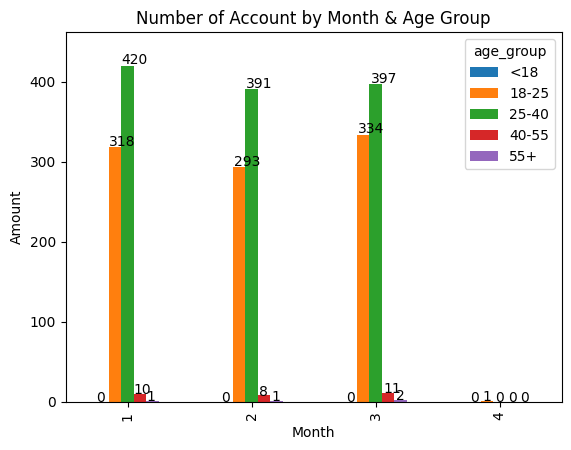

/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/803267301.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_trans_counts = df_saving.groupby(['month','age_group'])['account_id'].count()


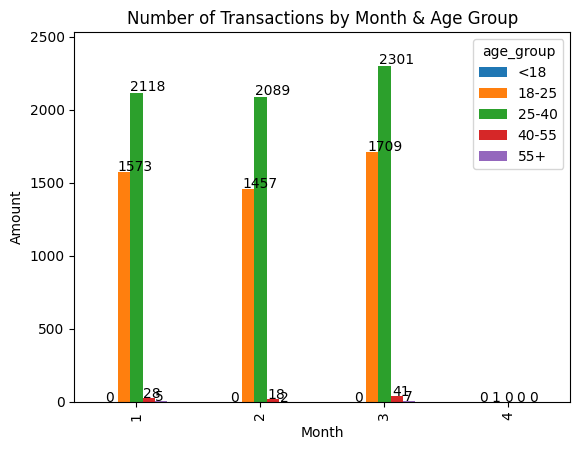

/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/803267301.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_amount = df_saving.groupby(['month', 'age_group']).agg({'txn_amount': lambda x: x.abs().mean()})


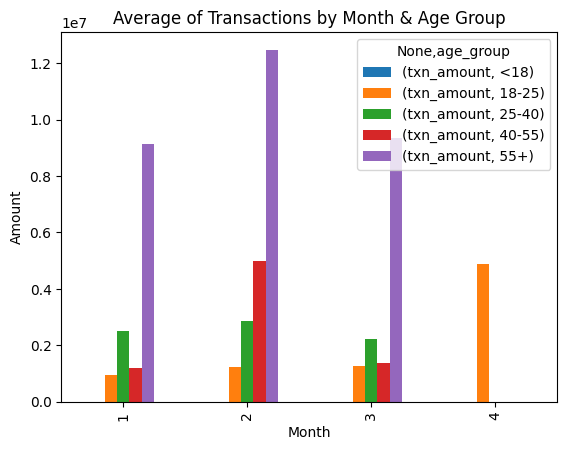

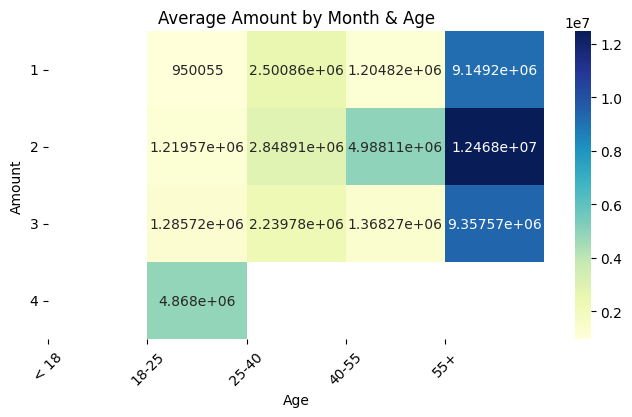

In [21]:
age_group_counts = df_saving.groupby(['month','age_group'])['account_id'].nunique() 

# Account
df_unstacked = age_group_counts.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Number of Account by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  # Đặt giới hạn cho trục y
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Number of transactions
age_group_trans_counts = df_saving.groupby(['month','age_group'])['account_id'].count() 

df_unstacked = age_group_trans_counts.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Number of Transactions by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Average of transaction
age_group_avg_amount = df_saving.groupby(['month', 'age_group']).agg({'txn_amount': lambda x: x.abs().mean()})

df_unstacked = age_group_avg_amount.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Average of Transactions by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

# plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

#Average of transactions
# age_group_avg_amount = df_external_tranfer.groupby(['month','age_group']).agg(
#     # avg_txn_amount=('txn_amount', lambda x: x.abs().mean()))
#     avg_txn_amount=('txn_amount', 'mean'))

heatmap_data = age_group_avg_amount.unstack(level='age_group')

plt.figure(figsize=(8, 4))
sns.heatmap(data=heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

age_group_names = ['< 18', '18-25', '25-40', '40-55', '55+']
plt.xticks(ticks=range(len(age_group_names)), labels=age_group_names, rotation=45)
plt.yticks(rotation=0)

plt.title('Average Amount by Month & Age')
plt.xlabel('Age')
plt.ylabel('Amount')

plt.show()


### ANALYSIS OF THE NUMBER OF TRANSACTIONS RELATED TO OTHER UTILITIES OF MOBILE BANKING APP

In [22]:
df_other_app = df[(df['txn_type_code'] == 5) | (df['txn_type_code'] == 6) ]
df_other_app

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code,month,age,age_group,datetime_formatted
6,ID000001,2000-01-12,2021-01-05 15:30:00,-50000,5,1,21,18-25,2021-01-05-15-30
23,ID000001,2000-01-12,2021-01-24 10:17:00,-50000,5,1,21,18-25,2021-01-24-10-17
43,ID000001,2000-01-12,2021-02-03 17:06:00,-94000,5,2,21,18-25,2021-02-03-17-06
46,ID000001,2000-01-12,2021-02-04 15:27:00,-52000,5,2,21,18-25,2021-02-04-15-27
60,ID000001,2000-01-12,2021-02-13 18:50:00,-106000,5,2,21,18-25,2021-02-13-18-50
...,...,...,...,...,...,...,...,...,...
199427,ID006842,2004-01-04,2021-02-14 10:09:00,22000,6,2,17,<18,2021-02-14-10-09
199438,ID006842,2004-01-04,2021-02-18 13:12:00,55000,6,2,17,<18,2021-02-18-13-12
199443,ID006842,2004-01-04,2021-02-23 16:44:00,1000,6,2,17,<18,2021-02-23-16-44
199449,ID006844,2002-02-19,2021-02-25 09:44:00,1000,6,2,19,18-25,2021-02-25-09-44


In [23]:
df_avg_trans_by_month = df_other_app.groupby(['month', 'age_group']).agg(
    avg_txn_amount=('txn_amount', lambda x: x.abs().mean()),
    txn_count=('txn_amount', 'count'),
    unique_account_count=('account_id', 'nunique')
)
df_avg_trans_by_month['avg_txn_amount'].fillna(0, inplace=True)
df_avg_trans_by_month['avg_txn_amount'] = df_avg_trans_by_month['avg_txn_amount'].astype(int)
df_avg_trans_by_month['avg_trans_per_acc'] = df_avg_trans_by_month['txn_count']/df_avg_trans_by_month['unique_account_count']
df_avg_trans_by_month['avg_trans_per_acc'].fillna(0, inplace=True)
df_avg_trans_by_month['avg_trans_per_acc'] = df_avg_trans_by_month['avg_trans_per_acc'].astype(int)
df_avg_trans_by_month



/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/3460609307.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg_trans_by_month = df_other_app.groupby(['month', 'age_group']).agg(


avg_txn_amount  txn_count  unique_account_count  \
month age_group                                                    
1     <18                     0          0                     0   
      18-25               50902        535                   271   
      25-40               97911        575                   276   
      40-55               92045         44                    21   
      55+                 54500         10                     9   
2     <18                 19750          4                     2   
      18-25               17815       2336                  1712   
      25-40               70344       1386                   933   
      40-55               38761        239                   184   
      55+                  8250         68                    60   
3     <18                     0          0                     0   
      18-25               51641        460                   232   
      25-40               77574        494                   245   
      40-55               97777         36                    21   
      55+                 56833         12                     7   

                 avg_trans_per_acc  
month age_group                     
1     <18                        0  
      18-25                      1  
      25-40                      2  
      40-55                      2  
      55+                        1  
2     <18                        2  
      18-25                      1  
      25-40                      1  
      40-55                      1  
      55+                        1  
3     <18                        0  
      18-25                      1  
      25-40                      2  
      40-55                      1  
      55+                        1

/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/1333865516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_other_app.groupby(['month','age_group'])['account_id'].nunique()


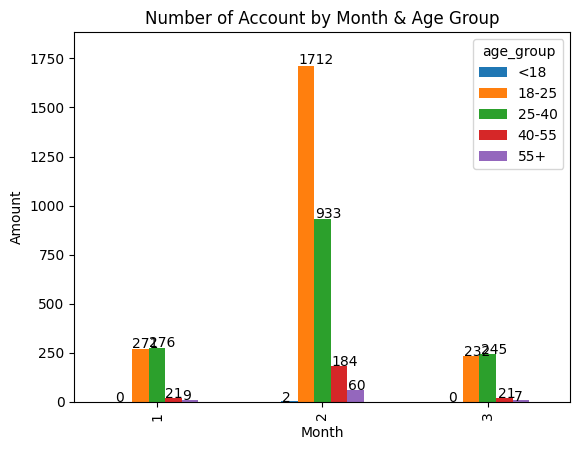

/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/1333865516.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_trans_counts = df_other_app.groupby(['month','age_group'])['account_id'].count()


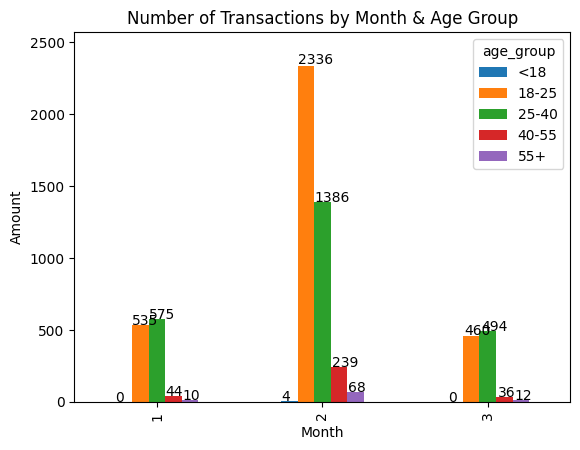

/var/folders/g7/7dbyqj0d4gl216klw4w9l7980000gn/T/ipykernel_40845/1333865516.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_amount = df_other_app.groupby(['month', 'age_group']).agg({'txn_amount': lambda x: x.abs().mean()})


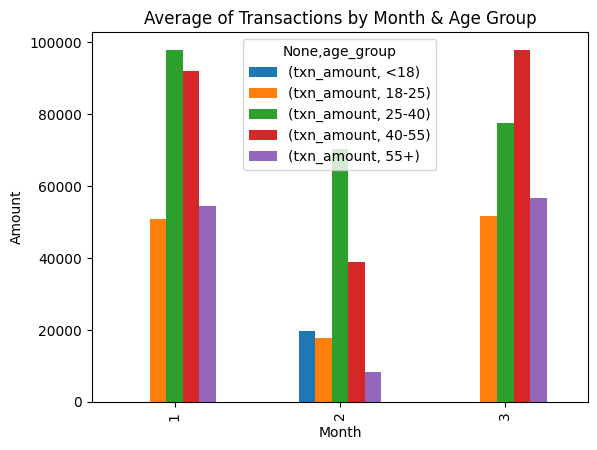

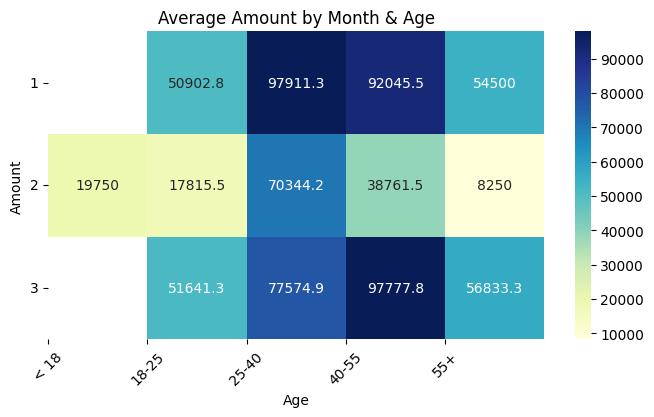

In [24]:
age_group_counts = df_other_app.groupby(['month','age_group'])['account_id'].nunique() 

# Account
df_unstacked = age_group_counts.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Number of Account by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  # Đặt giới hạn cho trục y
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Number of transactions
age_group_trans_counts = df_other_app.groupby(['month','age_group'])['account_id'].count() 

df_unstacked = age_group_trans_counts.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Number of Transactions by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Average of transaction
age_group_avg_amount = df_other_app.groupby(['month', 'age_group']).agg({'txn_amount': lambda x: x.abs().mean()})

df_unstacked = age_group_avg_amount.unstack()
ax = df_unstacked.plot(kind='bar')

plt.title('Average of Transactions by Month & Age Group')
plt.xlabel('Month')
plt.ylabel('Amount')

# plt.gca().set_ylim(0, df_unstacked.max().max() * 1.1)  
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

#Average of transactions
# age_group_avg_amount = df_external_tranfer.groupby(['month','age_group']).agg(
#     # avg_txn_amount=('txn_amount', lambda x: x.abs().mean()))
#     avg_txn_amount=('txn_amount', 'mean'))

heatmap_data = age_group_avg_amount.unstack(level='age_group')

plt.figure(figsize=(8, 4))
sns.heatmap(data=heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

age_group_names = ['< 18', '18-25', '25-40', '40-55', '55+']
plt.xticks(ticks=range(len(age_group_names)), labels=age_group_names, rotation=45)
plt.yticks(rotation=0)

plt.title('Average Amount by Month & Age')
plt.xlabel('Age')
plt.ylabel('Amount')

plt.show()
